In [1]:
#importing required libraries:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading Data
car_data = pd.read_csv('carsclean.csv')

In [3]:
#Exploring
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
city            560 non-null object
car_maker       560 non-null object
model           560 non-null object
year            560 non-null int64
condition       560 non-null object
kilometers      560 non-null float64
transmission    560 non-null object
fuel            560 non-null object
color           560 non-null object
pay_method      560 non-null object
price           560 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 48.2+ KB


In [4]:
car_data.shape

(560, 11)

In [5]:
car_data.head()

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,Toyota,Rush,2019,Used,14999.5,Automatic,Gasoline,White,Cash or Installments,58375.0
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,10000.0
2,Al Riyadh,Toyota,Camry,2014,Used,24999.5,Automatic,Gasoline,White,Installments Only,58375.0
3,Al Riyadh,Ford,Fusion,2010,Used,200000.0,Automatic,Gasoline,White,Cash Only,22425.4
4,Al Riyadh,Ford,Taurus,2018,Used,5000.0,Automatic,Gasoline,Grey,Cash Only,22425.4


In [6]:
car_data.describe()

,year,kilometers,price
count,560.000000,560.000000,560.000000
mean,2011.857143,120535.482143,37521.064286
std,3.892236,81305.837563,27022.610673
min,2006.000000,0.000000,2114.000000
25%,2008.000000,39999.500000,19000.000000
50%,2012.500000,149999.500000,27500.000000
75%,2014.250000,200000.000000,58375.000000
max,2019.000000,200000.000000,100000.000000


In [7]:
car_data.isnull().values.any()

False

### Dataset is clean and ready to be analyzed!

#### I will try to answer the following questions:
1.	What is the most poplar car maker in city Al Riyadh?
2.	What is the average car price?
3.	If the car bought used, what is the average kilometers that the car has been driven?


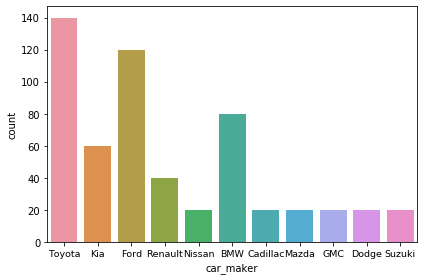

In [8]:
# Question 1)What is the most poplar car maker in city Al Riyadh? 
ax = sns.countplot(x='car_maker', data=car_data)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9.5)
plt.tight_layout()
plt.show()

In [9]:
# Question # 2) What is the average car price?
print(car_data['price'].mean())


37521.06428571428


In [10]:
# copy of data
car_data_copy = car_data
car_data_copy.head()

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,Toyota,Rush,2019,Used,14999.5,Automatic,Gasoline,White,Cash or Installments,58375.0
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,10000.0
2,Al Riyadh,Toyota,Camry,2014,Used,24999.5,Automatic,Gasoline,White,Installments Only,58375.0
3,Al Riyadh,Ford,Fusion,2010,Used,200000.0,Automatic,Gasoline,White,Cash Only,22425.4
4,Al Riyadh,Ford,Taurus,2018,Used,5000.0,Automatic,Gasoline,Grey,Cash Only,22425.4


In [11]:
# test
mean_car = car_data_copy.groupby(['car_maker']).mean().sort_values('price', ascending=False)
mean_car

,year,kilometers,price
car_maker,,,
BMW,2009.000000,178749.875000,62500.0
Toyota,2013.285714,100714.071429,58375.0
Cadillac,2008.000000,174999.500000,40000.0
Nissan,2009.000000,200000.000000,36000.0
Dodge,2012.000000,200000.000000,35000.0
Ford,2013.333333,141666.416667,26160.8
Suzuki,2013.000000,14999.500000,24000.0
GMC,2007.000000,200000.000000,22000.0
Mazda,2013.000000,154999.500000,16000.0


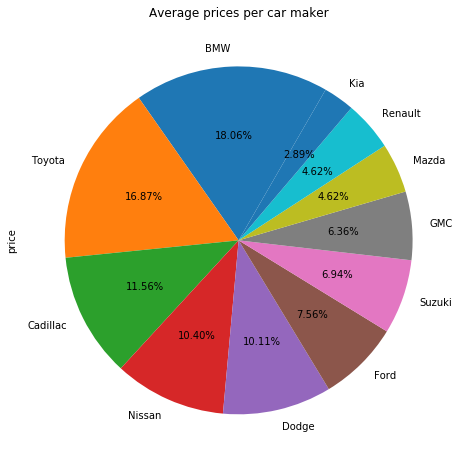

In [12]:
#Plot
mean_car.plot( y = 'price',use_index=True, figsize=(10,8), kind='pie', title='Average prices per car maker' 
              ,autopct='%1.2f%%',legend = None,startangle=60)

### Althogh Toyata is the most poplar car maker, however it is the second most expensive brand.
##### Why ?
I have found this interviw for Mr. Takayuki Yoshitsugu, chief representative of Toyota Motor Corporation in the Middle East and North Africa. To Quote his response on the poplarity and why Toyta own 35% of the market share in Kingdom of Saudi Arabia;
> Toyota is always working to provide ever better cars which exhibit the enduring attributes of performance, design, quality, durability and reliability that Toyota has become synonymous for.



## References :
https://www.arabnews.com/motoring/news/897836

In [13]:
# Question 3) If the car bought used, what is the average kilometers that the car has been driven?
used_car = car_data_copy.groupby(car_data_copy['condition']).mean().sort_values('kilometers', ascending=False)
used_car

,year,kilometers,price
condition,,,
Used,2011.592593,124999.759259,35262.585185
New,2019.000000,0.000000,98500.000000


In [14]:
row = used_car.iloc[0]
row

year            2011.592593
kilometers    124999.759259
price          35262.585185
Name: Used, dtype: float64

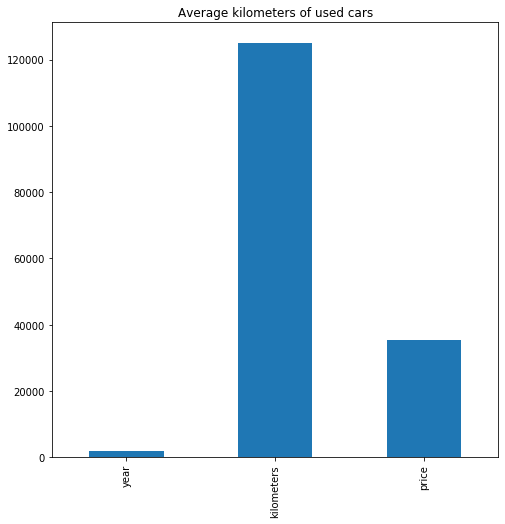

In [15]:
#Plot
row.plot( use_index=True, figsize=(8,8), kind='bar', title='Average kilometers of used cars' 
              ,legend = None ,y='kilometers' )

### Data Source:
https://www.kaggle.com/energykingdom/saudi-arabia-car-prices-machine-learning
